<a href="https://colab.research.google.com/github/razzkoirala/devops-camp-pipeline/blob/main/LabDocument/2_Containerization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Containerization & Introduction to the Lab Environment

Updated 7/15/2022

## Overview

In this lab, students will learn about containers and create the container that they will use as their environment for the remaining labs

**Estimated Time:** 45 min


## Learning Objectives

1. Create a Dockerfile

2. Build and Run the Container

3. Commit the Container as a New Image

#Instructions

## Prerequisites

### Create a Harbor Project



Create a Harbor project by following the instructions below:
  
1. Navigate to Harbor in your browser (https://harbor.dev.afsmtddso.com/) and click “New Project”

<figure>
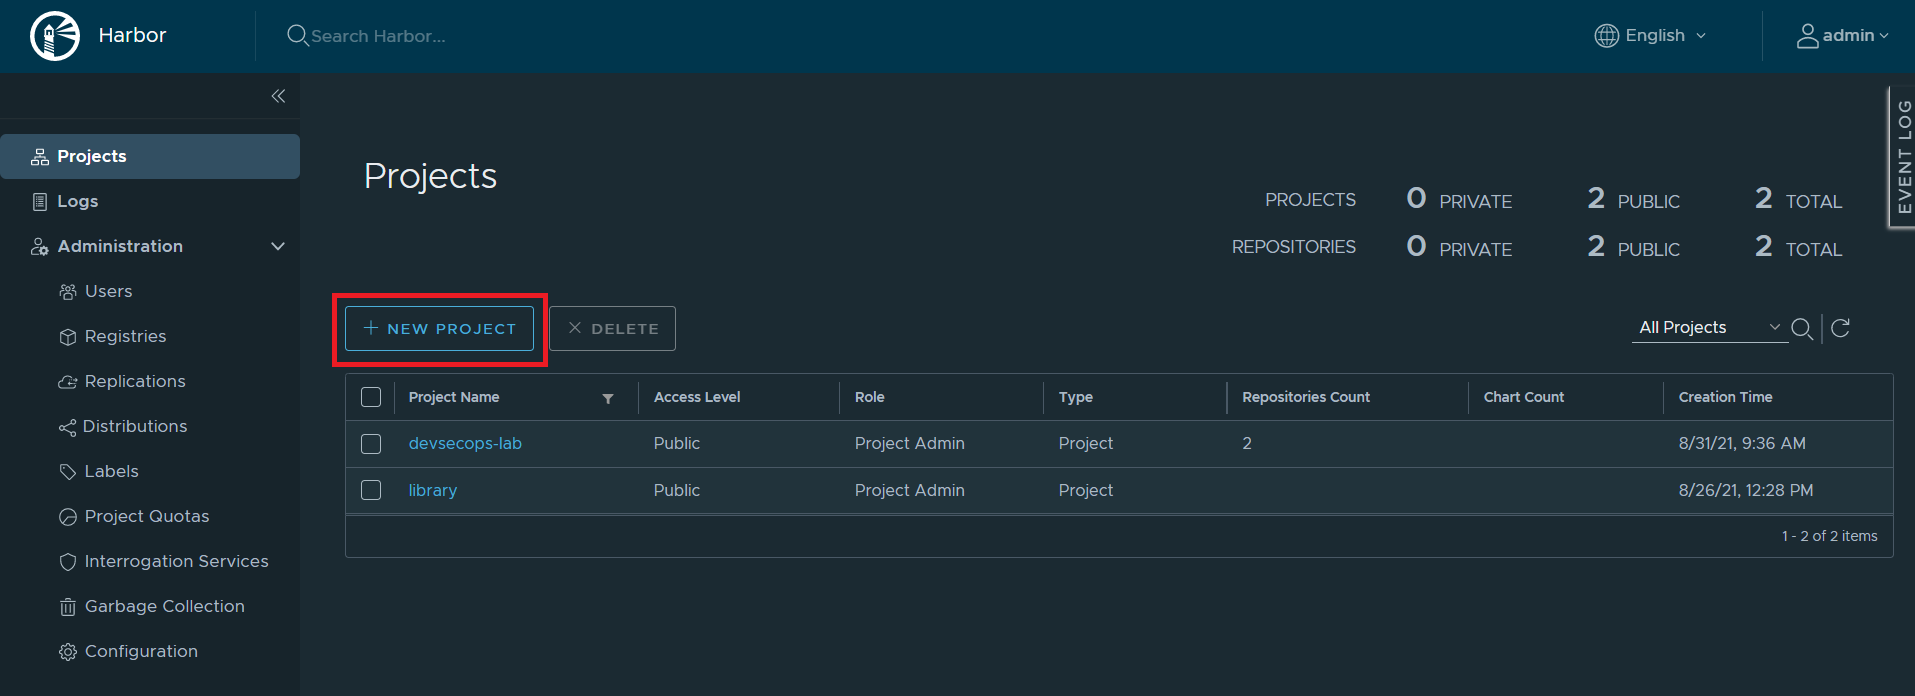
<figure>

<ul>
2. Name your project <code>&lt;first name initial + last name&gt;-harbor-project</code> and check the “Public” box to make your project accessible without having to provide credentials
</ul>

<figure>
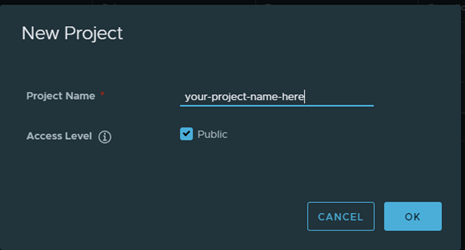
<figure>


<ul>
3. Click "OK” to finish creating your new project
</ul>

### Set up Docker

1. SSH into your EC2 with VSCode Remote SSH if you haven't already

2. Provide Docker with your Harbor credentials by following the steps below:

  a. Open your intergrated terminal in VSCode

  > **Tip:** It should be there already (see image below) but if not,select View in the menu bar and click on "Terminal"


<figure>
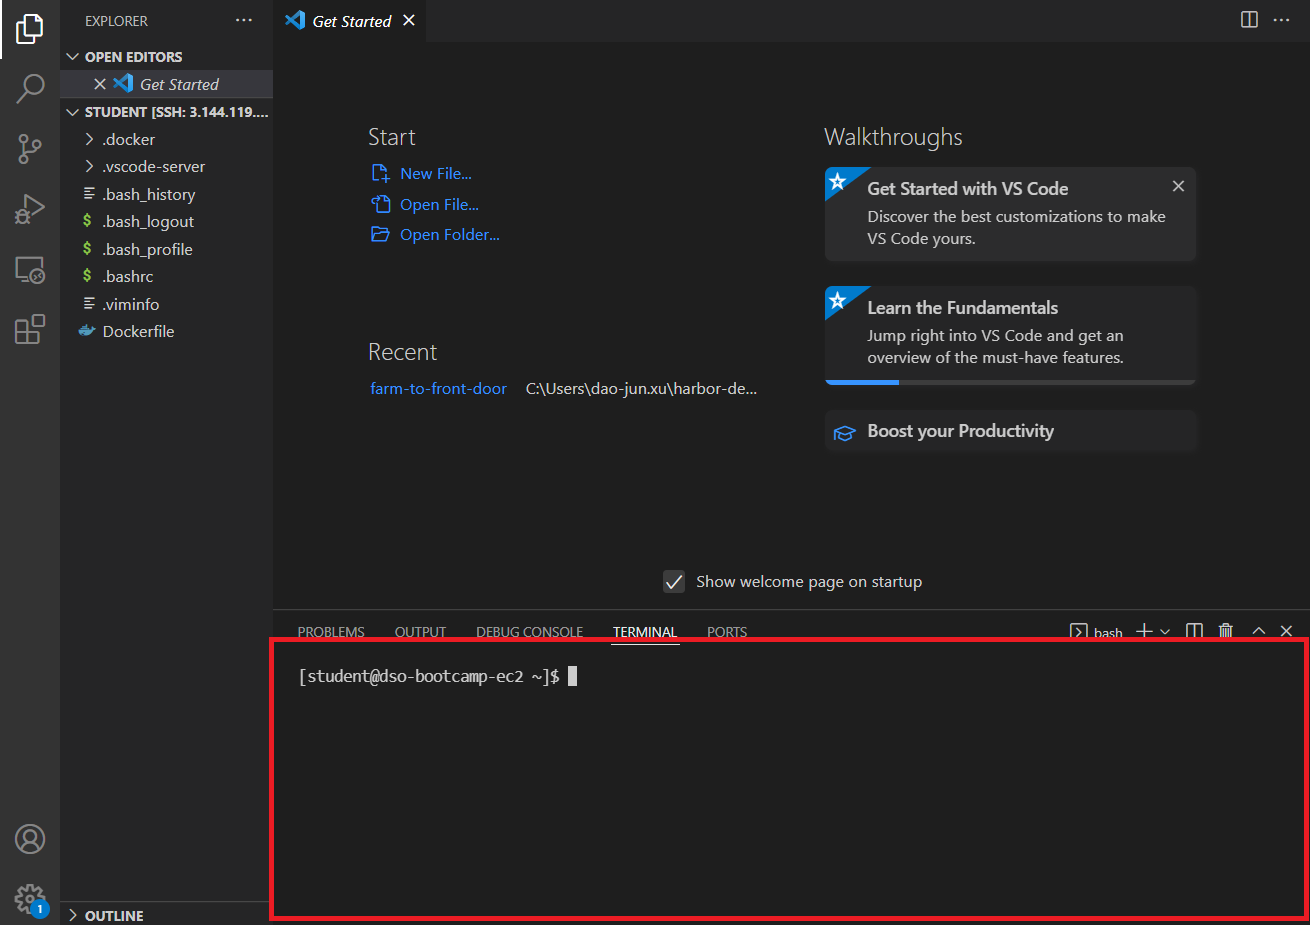
</figure>

<ul>
   b. Run the following command (replace <code>&lt;USERNAME&gt;</code> with the username you were given):

```
docker login -u <USERNAME> https://harbor.dev.afsmtddso.com/
```
  
  d. Input your Harbor password when prompted. If you see "Login Succeeded," you can move on!
</ul>

## Create a Dockerfile

1.	Under the "Explorer" section (please see first image below) of VSCode on the left side of the screen, right-click and create a new folder named `.devcontainer` (please see second image below for the menu that you should see after right-clicking)


<figure>
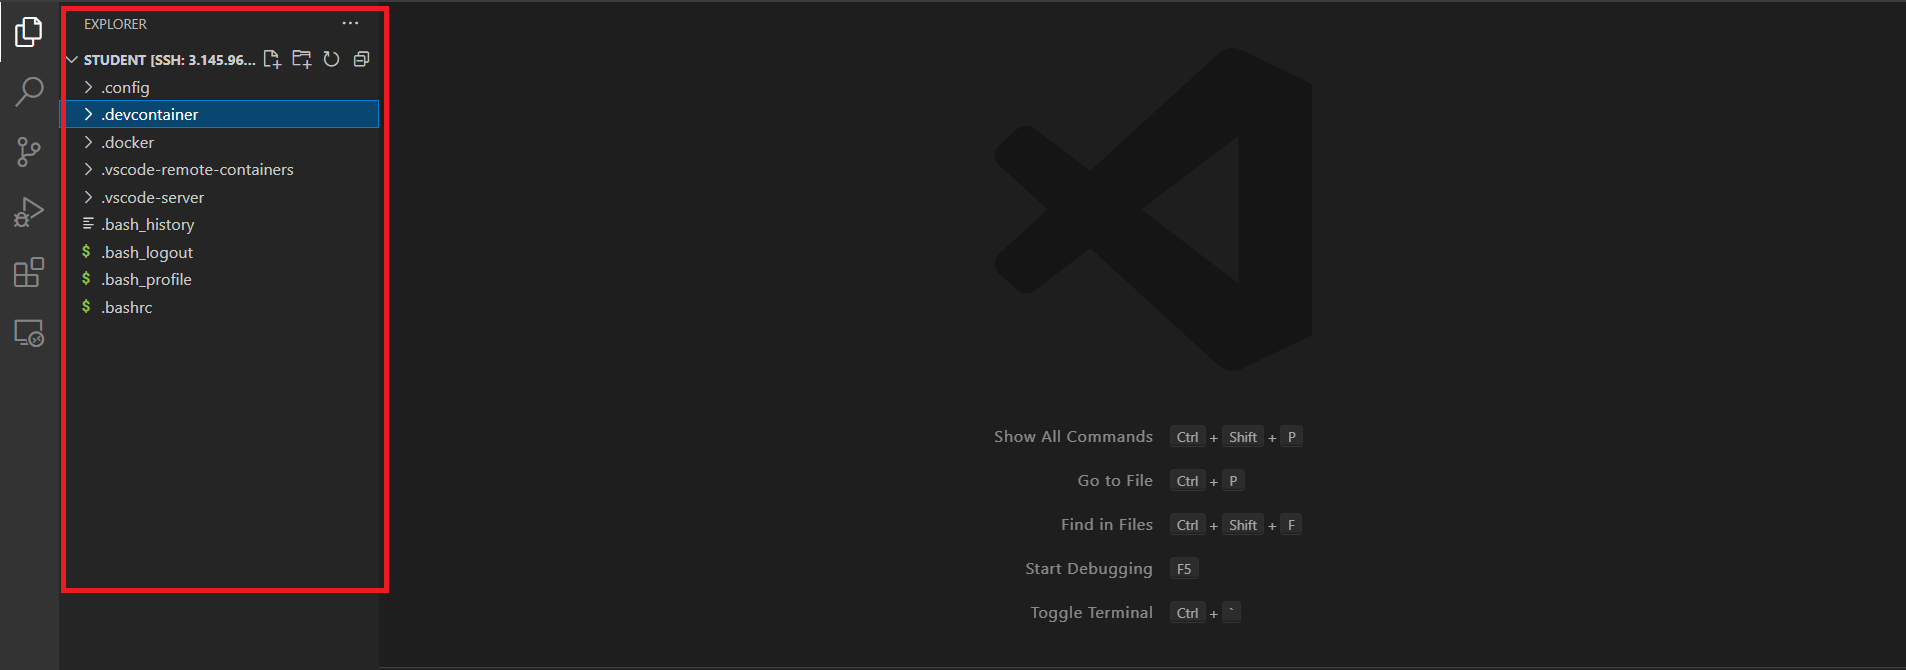
</figure>

<figure>
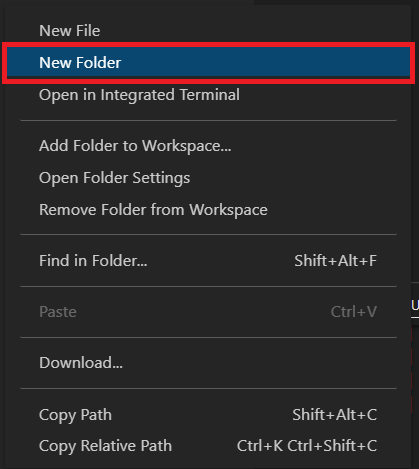
</figure>

2. Right-click on the `.devcontainer` folder to create a new file called `Dockerfile` within `.devcontainer`

3.	Paste the following code into your `Dockerfile`

In [ ]:
FROM ubuntu:20.04

RUN apt-get update -y && \
    apt-get install curl zip vim git -y && \
    curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip" && \
    unzip awscliv2.zip && ./aws/install && \
    curl -LO "https://dl.k8s.io/release/$(curl -L -s https://dl.k8s.io/release/stable.txt)/bin/linux/amd64/kubectl" && \
    install -o root -g root -m 0755 kubectl /usr/local/bin/kubectl && \
    rm kubectl awscliv2.zip && \
    mkdir /root/dso-bootcamp-home

WORKDIR /root/dso-bootcamp-home

<ul>

> **Explanation of code:** 
>
> The `FROM` instruction is typically the first instruction in a Dockerfile. Any commands following them act upon the base image. `FROM ubuntu:20.04` in particular will ensure that our container is running ubuntu as the base operating system for this container).
>
> The `RUN` instruction will run all the commands in the statement within the container. These commands install `curl`, `zip`, `vim`, `git`, the AWS CLI, and `kubectl`, which will all be relevant in upcoming labs. The `mkdir` command will create your home directory.
>
> The `WORKDIR` instruction changes the working directory of your container to /root/dso-bootcamp-home so you don’t have to worry about changing directories every time you bash into your container.

> **Note:** Running commands in your container requires opening an interactive bash shell, so it is also referred to as "bashing into your container."

4. Save your changes by going to "File" → "Save" or holding down Ctrl + S on your keyboard

<figure>
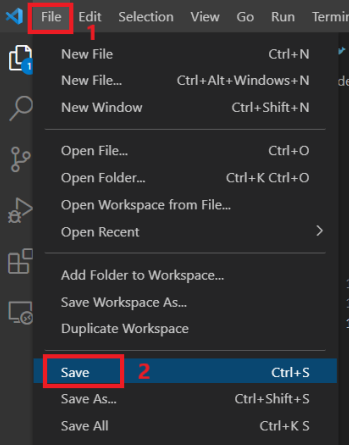
</figure>

## Build and Run the Container

1.	To build your new environment image, make sure you're in the `~` folder in your integrated terminal (i.e., if the prompt is `[student@dso-bootcamp-ec2 ~]$`) before running the following command:  

  ```
  docker build -t lab-env .devcontainer
  ```

  > **Note:** The `-t` is how we name our image “lab-env.” If we didn’t specify a name, the system would generate a random name made of letters and numbers.
>
> In the console output of this command, you will see the official `ubuntu:20.04` image being pulled from the Docker registry

2.	Verify the image build by running the following command 
```
docker images
```
  a. You should see an image titled “lab-env”

<figure>
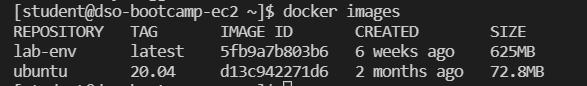
</figure>

3.	To run this image as a container, run the following command:

  ```
  docker run -v lab-vol:/root --rm --hostname lab-env --name lab-env -itd lab-env:latest
  ```

<ul>

> **Explanation of command:** `-v` attaches a volume or storage system to your container that will persist your data after the container is stopped. In this case, the volume is named `lab-vol` and it is attached in the container on the `/root` directory, so any files placed there will persist. You can verify your persistent storage has been created by running: 
> ```
docker volume ls
```
>
> `--rm` automatically removes containers in the "Exited" state
>
> `--hostname` will change the hostname of your container; this will help differentiate between which environment you're working on
>
> `--name` specifies the name of your container; in this case, it’s `lab-env`
>
> The “it” in `-itd` will allow us execute commands inside the container
>
> The “d” in `-itd` runs the command in detached mode so your container will run in the background of your terminal
>
> The argument at the very end is the name of the image you’re running; in this case, it’s `lab-env:latest`

> _**IMPORTANT:**_ For the rest of this course, you'll need to make sure your container is running. Save this command:
>
> ```
docker ps -a
```
This command will show you a list of your existing containers. Check to see that your `lab-env` container is in the list. If it isn't, you'll have to use the `docker run` command from the above section to create the container again.

</ul>

4. Use VSCode as your editor in the newly created container

  a. Under the "Remote Explorer" tab, click on the drop-down menu and select "Containers"

<figure>
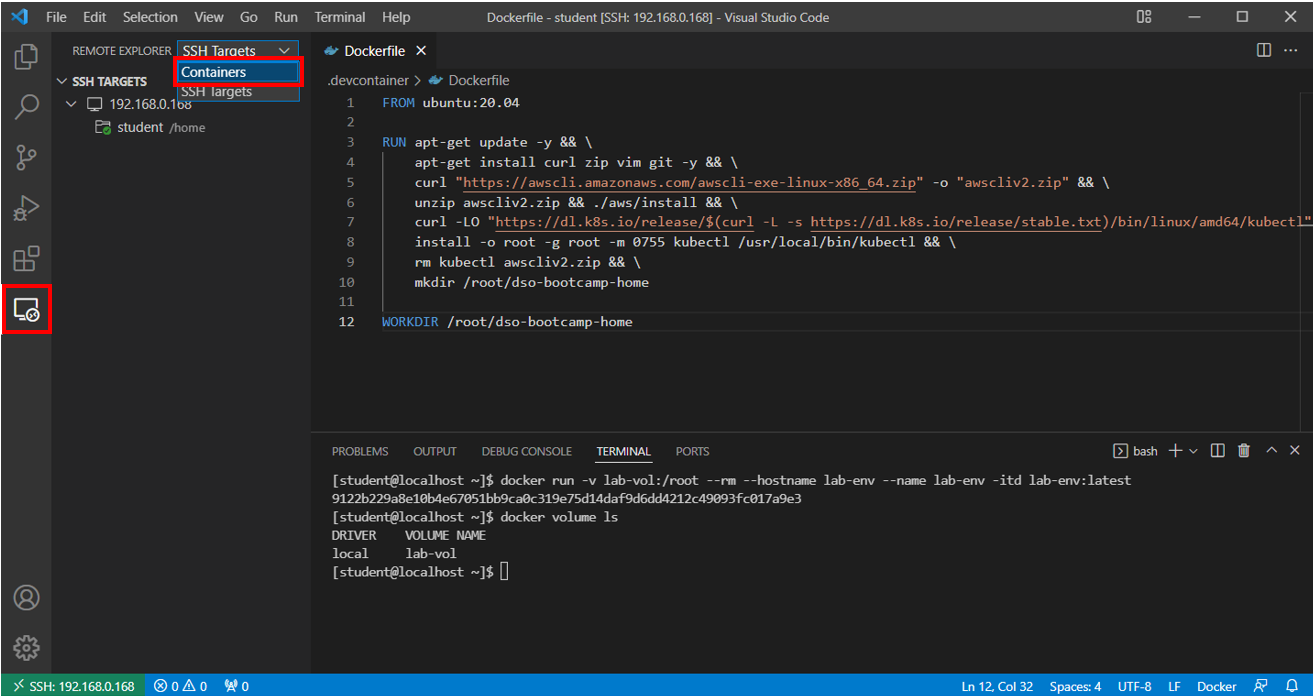
</figure>

<ul>

b. Click on "Refresh" and enter your password when prompted

> **Note:** VSCode will now show a list of running containers and created volumes in your EC2.

c. Under "Containers", right-click on "lab-env:latest" and select "Attach to Container" to enter your lab environment.

</ul>

<figure>
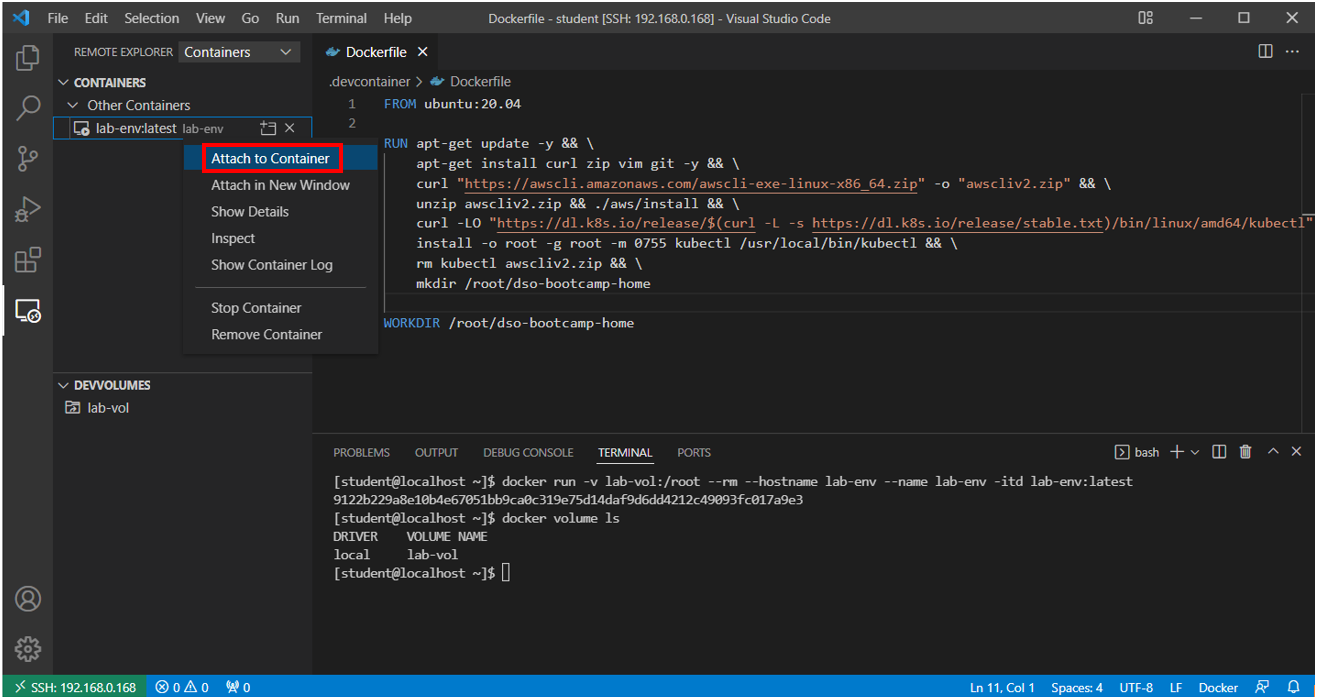
</figure>

<ul>

> **Note:** If you get a pop-up saying "Attaching to a container may execute arbitrary code," click "Got it."

d. Enter your password if prompted to when attaching to the container

> **Note:** You can close the previous window if VSCode creates a new window for your container.

e. Open the `dso-bootcamp-home` folder by following the instructions below:

  <ul>

  i. On the side bar, click on the "Explorer" icon

  ii. Click on "Open Folder"

  iii. Enter the path `/root/dso-bootcamp-home` to open

  </ul>

f. Verify that you are in your container environment by checking the following indicators:

  <ul>

  i. The top of your screen should say `dso-bootcamp-home [Container lab-env:latest (lab-env) ...]`

  ii. Your "Explorer" section should have a dropdown that starts with `DSO-BOOTCAMP-HOME`
  </ul>

</ul>

<figure>
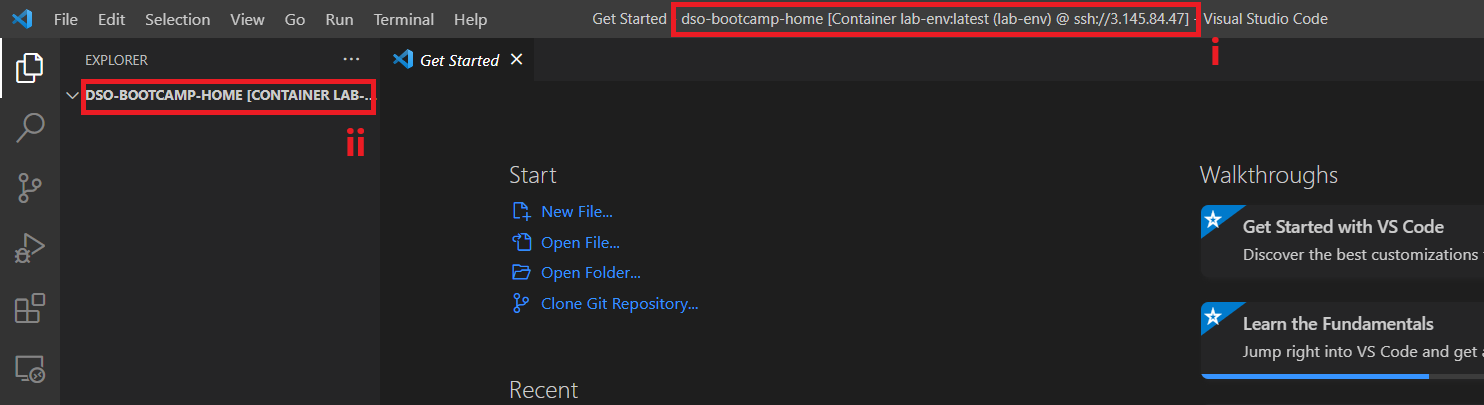
</figure>

<ul>

  <ul>

  iii. Your terminal should prompt you with `root@lab-env:~/dso-bootcamp-home#`

  iv. The bottom left corner of your screen should have a green box that says `Container lab-env:latest (lab-env)`
  </ul>

</ul>

<figure>
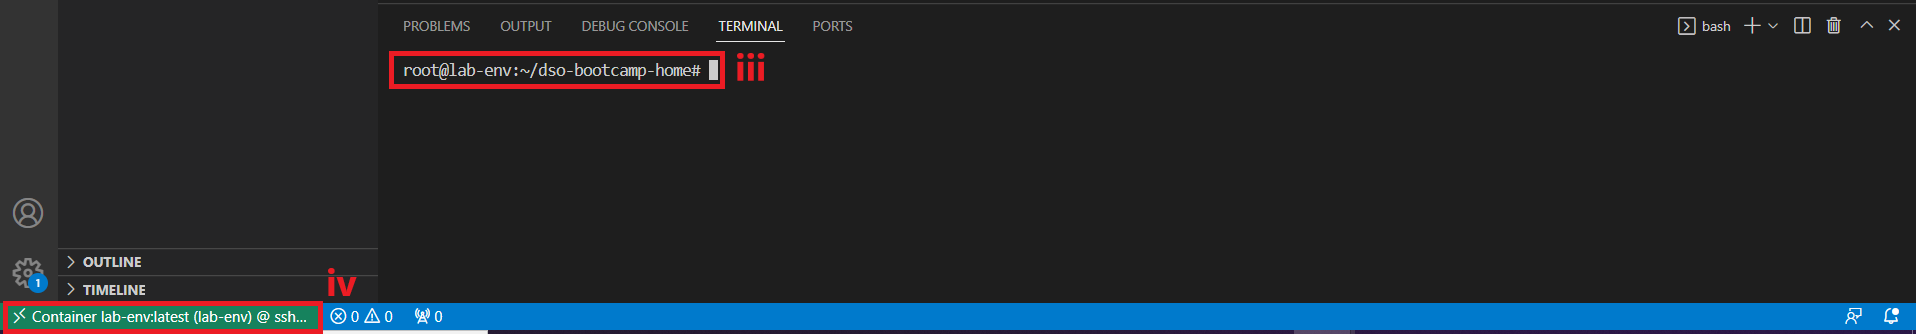
</figure>

<ul>

> **Tip:** If your terminal disappears, re-open it by right-clicking on the left pane of the "Explorer" tab and selecting "Open in Integrated Terminal"

</ul>

5.	In the integrated terminal, verify the installation of the required CLI tools by running the following commands individually:

  a.	`git --version`

  b.	`aws --version`

  c.	`kubectl version`

 > **Note:** `kubectl version` should return an error that it cannot connect to a server on `localhost:8080`. This is normal, and `kubectl` is functioning correctly if this happens.

## Push the Container as a New Image

At the start of this lab, we pulled the `ubuntu:20.04` image from the official Docker registry and used it to build our `lab-env` image. Now that we’ve successfully built it, we can push `lab-env` to our own registry (i.e., Harbor) to allow other users to pull it and use it on their machines. 

1. Go back to your EC2 by switching from "Containers" to "SSH Targets" under the "Remote Explorer" tab

  a. Under your EC2's IP address, you should see your `/home` folder; right-click on it and select "Open on SSH Host in New Window"

<figure>
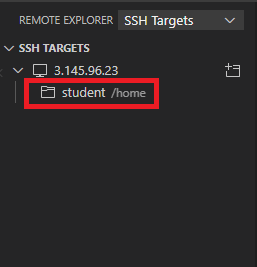
</figure>

<ul>

  b. Enter your password when prompted

  > **Note:** VSCode will create a new window when editing inside your EC2.

  </ul>

2.	Push your image to Harbor by following the steps below:

  a.	Duplicate the image and name the new copy at the same time by running the following command, in the terminal, after replacing the placeholders:
  
  ```
docker tag lab-env harbor.dev.afsmtddso.com/<PROJECT>/<REPOSITORY>:<VERSION TAG>
```

<ul><ul>

i. `PROJECT` is the name of the Harbor project you created at the beginning of this lab (should be first initial + last name - harbor-project)

ii.	`REPOSITORY` is the name of your repository. Since we don’t have one yet, we can replace it with `lab-env-repo` and it will be created automatically when you push the image.

iii.	The `VERSION TAG` is the version. For this project, put `1.0`

> **Note:** Harbor’s hierarchy for storing images is as follows: Projects → Repositories → Artifacts → Images
>
>Projects separate images by either the users that create them or the respective tasks they belong to. Repositories further categorize images based on what they deploy. Artifacts are the different build versions of an image.

</ul>

  b. Run the following command to push the newly tagged image to your Harbor project:
```
docker push harbor.dev.afsmtddso.com/<PROJECT>/lab-env-repo:1.0
```
</ul>

## You're done if...

Go to https://harbor.dev.afsmtddso.com/ and navigate to your project, then your `lab-env-repo` repository, then click on the artifact at the top.	If you see an image with a `1.0` tag in the “Name” column, your push was successful!